<a href="https://colab.research.google.com/github/farhan1503001/GRIP-TASK-01/blob/main/Prediction_Using_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taks-1: Prediction of Percentage of Students Based on Hours of Studying


> **The Sparks Foundation-Graduate Rotational Internship Programme(Batch-July(2021)**



> **Data Science and Business Analytics Internship**



> **Submitted By: Mohd.Farhan Israk Soumik**



***

> **Importing Required Libraries**



---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk




> **Importing Dataset**



In [ ]:
url="http://bit.ly/w-data"
dataset=pd.read_csv(url);
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Close Observation and Visualization of Dataset**

In [ ]:
#Checking the shape and size of the dataset
numelement,num_feature=dataset.shape
print("Number of elements in the dataset: ",numelement);
print("Number of features in the dataset: ",num_feature)

Number of elements in the dataset:  25
Number of features in the dataset:  2


In [ ]:
#Checking the statistical condition/situation of the dataset
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64



> ***From the statistical description, we can see that count for Hours and Scores are both same and both of them are also equal to number of elements of the dataset  ***



In [ ]:
#Finding the correlation between features
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


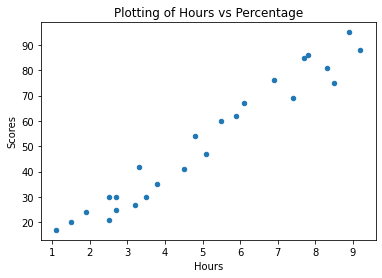

In [ ]:
dataset.plot(x='Hours',y='Scores',kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Plotting of Hours vs Percentage')
plt.show()


# **Dataset Preparation**

> **Label feature separation**



In [ ]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values
#observation
print(x[:5])
print(y[:5])

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]]
[21 47 27 75 30]




> **Train Test Split**



In [ ]:
x_train,x_test,y_train,y_test=sk.model_selection.train_test_split(x,y,test_size=0.20)

**Observing Train and Test Set Split**

In [ ]:
#Observing first 10 values of train and test set
print(x_train[0:10])
print(x_test)

[[3.3]
 [5.9]
 [6.9]
 [5.1]
 [2.7]
 [7.8]
 [2.7]
 [6.1]
 [1.9]
 [8.5]]
[[9.2]
 [3.2]
 [7.7]
 [8.9]
 [7.4]]


In [ ]:
#Observing training and test labels
print(y_train[0:10])
print(y_test[0:2])
#Reshaping to create n*1 vector form
y_train=y_train.reshape((len(y_train),1))
y_test=y_test.reshape((len(y_test),1))
print(y_train[0:10])
print(y_test[0:2])

[42 62 76 47 30 86 25 67 24 75]
[88 27]
[[42]
 [62]
 [76]
 [47]
 [30]
 [86]
 [25]
 [67]
 [24]
 [75]]
[[88]
 [27]]


# **Machine Learning Section**

>  **Applying Linear Regression Model on dataset**



In [ ]:
from sklearn.linear_model import LinearRegression
regressor_model=LinearRegression()
regressor_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


> **Observing Accuracy and other metrices**

In [ ]:
print("Train R2 Metrics Value: ",regressor_model.score(x_train,y_train))
print("Test R2 Metrics Value: ",regressor_model.score(x_test,y_test))

Train R2 Metrics Value:  0.9437386008128922
Test R2 Metrics Value:  0.9356439881193909


**Here near uniformity between training accuracy and testing accuracy shows low variance or in simple sense declares that our model is not overfitting** 



> **Analyzing Train and Test Set Performance with Errors** 



**Training Set Errors**

In [ ]:
#Finding Training error
train_predict=regressor_model.predict(x_train)
mean_error=sk.metrics.mean_absolute_error(y_train,train_predict)
mean_squar_error=sk.metrics.mean_squared_error(y_train,train_predict)
root_mean_squared_error=np.sqrt(mean_squar_error)
print("Mean Absolute Training Error ",mean_error);
print("Mean Squared Training Error ",mean_squar_error);
print("Root Mean Squared Training Error ",root_mean_squared_error)

Mean Absolute Training Error  4.62251009163047
Mean Squared Training Error  26.78197320154097
Root Mean Squared Training Error  5.1751302593790784




> **Predicted Test Set Result**



In [ ]:
#Predicting test_set results
y_pred=regressor_model.predict(x_test)
y_pred

array([[91.74262121],
       [34.21249981],
       [77.36009086],
       [88.86611514],
       [74.48358479]])

**Test Set Errors**

In [ ]:
#Finding Test Set Errors
mean_error=sk.metrics.mean_absolute_error(y_test,y_pred)
mean_squar_error=sk.metrics.mean_squared_error(y_test,y_pred)
root_mean_squared_error=np.sqrt(mean_squar_error)
print("Mean Absolute Training Error ",mean_error);
print("Mean Squared Training Error ",mean_squar_error);
print("Root Mean Squared Training Error ",root_mean_squared_error)

Mean Absolute Training Error  6.0424999616287804
Mean Squared Training Error  38.41796485224838
Root Mean Squared Training Error  6.198222717218895


In [ ]:
#Comparison between results
print(list(y_pred))
print(list(y_test))

[array([91.74262121]), array([34.21249981]), array([77.36009086]), array([88.86611514]), array([74.48358479])]
[array([88]), array([27]), array([85]), array([95]), array([69])]




> **Visualization of the model**



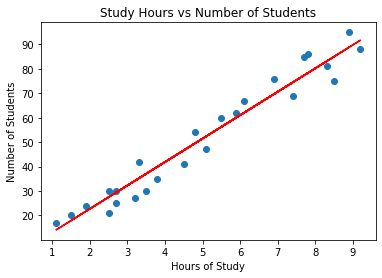

In [ ]:
#First creating the line with y=mx+c
line=regressor_model.coef_*x+regressor_model.intercept_
#Now plotting first scatter
plt.scatter(x,y,marker='o')
#Now plotting model regressionline
plt.plot(x,line,color='red')
plt.xlabel('Hours of Study')
plt.ylabel('Number of Students')
plt.title("Study Hours vs Number of Students")
plt.show()

# **Prediction Result**

In [ ]:
hours=9.25
num_students=regressor_model.predict([[hours]])
print("Predicted Student Numbers who study for ",hours," is {%.2f}:",num_students[[0]])

Predicted Student Numbers who study for  9.25  is {%.2f}: [[92.22203889]]


# **Hence we can concluded that if a student is involved in 9.25 hours per day ,then there is a possibility that the percentage comes out to be 92.22203889 or roughly 92**

**Thank you**